In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json

from bhpwave.waveform import KerrWaveform
from bhpwave.harmonics.amplitudes import HarmonicAmplitudes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import LogLocator
import os

latex_setting = {'text.usetex': True,
        'font.family': 'serif',
        'font.serif': 'cmr10',
        'font.weight':'medium',
        'mathtext.fontset': 'cm',
        'text.latex.preamble': r"\usepackage{amsmath}",
        # 'font.size': 14,
        # 'figure.figsize': (7, 7),
        # 'figure.titlesize': 'large',
        'axes.formatter.use_mathtext': True,
        # 'axes.formatter.limits': [-2, 4],
        # 'axes.titlesize': 'large',
        # 'axes.labelsize': 'large',
        'xtick.top': True,
        # 'xtick.major.size': 5,
        # 'xtick.minor.size': 3,
        # 'xtick.major.width': 0.8,
        # 'xtick.minor.visible': True,
        'xtick.direction': 'in',
        # 'xtick.labelsize': 'medium',
        'ytick.right': True,
        # 'ytick.major.size': 5,
        # 'ytick.minor.size': 3,
        # 'ytick.major.width': 0.8,
        # 'ytick.minor.visible': True,
        'ytick.direction': 'in',
        # 'ytick.labelsize': 'medium',
        # 'legend.frameon': True,
        # 'legend.framealpha': 1,
        # 'legend.fontsize': 'medium',
        # 'legend.scatterpoints' : 3,
        #'lines.color': 'k',
        # 'lines.linewidth': 2,
        # 'patch.linewidth': 1,
        # 'hatch.linewidth': 1,
        # 'grid.linestyle': 'dashed',
        'grid.linewidth' : 0.3,
        # 'savefig.dpi' : 200,
        # 'savefig.format' : 'pdf',
        # 'savefig.bbox' : 'tight',
        'savefig.transparent' : True,
    }
plt.rcParams.update(latex_setting)


In [14]:
path = os.getcwd() + "/Data/"
with open (path + "final_phase_across_models_full_newmass.json", "r") as f:
    phase_data = json.load(f,)

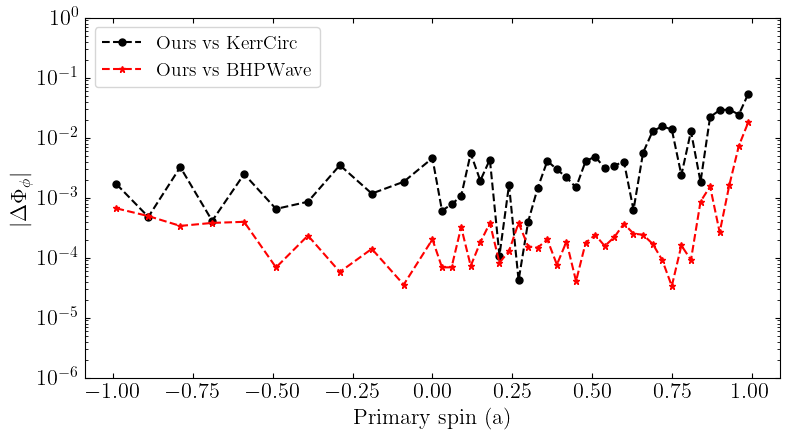

In [17]:
path_traj_data = "/mnt/beegfs/hkhalvati/data_for_KerrEcc_comparison/" 
traj_KerrCirc = np.loadtxt(path_traj_data + "Traj_KerrCirc_full_newmass.txt")
a_arr = np.unique(traj_KerrCirc[:,0])
delta_phi_KerrCirc = np.zeros(len(a_arr))
delta_phi_BHPWave = np.zeros(len(a_arr))
for ii, aa in enumerate(a_arr):
    data_aa = phase_data[f"spin_{aa:.4f}"]
    phase_KerrCirc = data_aa["KerrCirc"]["Phi_phi_final"]
    phase_KerrEcc = data_aa["KerrEcc"]["Phi_phi_final"]
    phase_BHPWave = data_aa["BHPWave"]["Phi_phi_final"]
    # print(f"spin {aa:.2f} phase_KerrCirc {phase_KerrCirc:.8f} phase_KerrEcc {phase_KerrEcc:.8f} phase_BHPWave {phase_BHPWave:.8f}\n")
    t_final = data_aa["KerrCirc"]["t_final"]
    delta_phi_KerrCirc[ii] = phase_KerrEcc - phase_KerrCirc
    delta_phi_BHPWave[ii] = phase_KerrEcc - phase_BHPWave
    # print(f"spin {aa:.2f} delta_phi_KerrCirc {delta_phi_KerrCirc:.8f} delta_phi_BHPWave {delta_phi_BHPWave:.8f}")
    # print(f"min separation: KerrCirc {data_aa['KerrCirc']['p_final']:.8f} , KerrEcc {data_aa['KerrEcc']['p_final']:.8f}, BHPWave {data_aa['BHPWave']['p_final']:.8f}")




title_fontsize = 20
label_fontsize = 16
tick_fontsize = 16
legend_fontsize = 14
text_fontsize = 14

fig, ax = plt.subplots(figsize=(8, 4.5))
ax.plot(a_arr, abs(delta_phi_KerrCirc), "o--", color="k", markersize=5, label="Ours vs KerrCirc", rasterized=True)
ax.plot(a_arr, abs(delta_phi_BHPWave), "*--", color="r", markersize=5, label="Ours vs BHPWave",rasterized=True)
ax.set_xlabel("Primary spin (a)", fontsize=label_fontsize)
ax.set_ylabel(r"$|\Delta \Phi_{\phi}|$", fontsize=label_fontsize)
ax.set_yscale("log")
ax.legend(loc="upper left", fontsize=legend_fontsize)
plt.tick_params(axis="both", which="major", labelsize=tick_fontsize)
plt.ylim(1e-6, 1e0)
# ax.grid()
plt.tight_layout()
plt.savefig(path + "Cross_codes_phase_shift_vs_a.pdf")
